In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

**TASK 1**

Import both sift and foldx datasets; in both datasets, create a column specific_Protein_aa which will be a cantenation of the Protein and Amino_acid columns such 
that If you have Protein A5A607 and Amino_acid E63D, you have specific_Protein_aa A5A607_E63D

In [2]:
#Getting the data
sift_url <- "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv"


**Error encountered**

#sift <- read.table(sift_url, sep = "\t", header = TRUE, stringsAsFactors = FALSE)
#print(head(sift))
#reading the sift data gave the output:

_Error in read.table(url1, sep = "\t", header = TRUE, stringsAsFactors = FALSE) :more columns than column names
Execution halted._

In [3]:
# I had to inspect using readLines() to know what could have caused the error because the data looked visually okay.
lines <- readLines(sift_url)
# View the first few lines
head(lines, 10)

Warning message in readLines(sift_url):
“incomplete final line found on 'https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv'”


[1] "Protein Amino_Acid  sift_Score" "A5A607\tK60Q\t0.197798536639"  
 [3] "A5A607\tY56C\t0.1749700816"     "A5A607\tY56S\t0.415581324441"  
 [5] "A5A630\tA16V\t0.516738103414"   "A5A630\tA47T\t0.387271338506"  
 [7] "A5A630\tA64E\t0.309499649152"   "A5A630\tA64T\t0.411761760925"  
 [9] "A5A630\tA64V\t0.510159812944"   "A5A630\tA89V\t0.919670508983"

# Checking the level of incompleteness in the error line

In [4]:
# Split each line by tab and check how many fields are in each line
field_counts <- sapply(lines, function(x) length(strsplit(x, "\t")[[1]]))
# View distribution of column counts
table(field_counts)

field_counts
     1      3 
     1 155467 

One line has one column and 155467 lines has 3 columns.

Which line has this error?

In [5]:
which(field_counts != field_counts[2])

Protein Amino_Acid  sift_Score 
                             1

#For the code above, I had initially checked for lines that are not equvalent to the header and it returned all records. This confirmed the header was had the error.

What is the nature of the header error? 


In [6]:
length(strsplit(lines[1], "\t")[[1]])  

[1] 1

This showed that the header was a one continous string not separated by tab.

I decided to keep only lines that have excatly 3 fields and manually compute the header

In [7]:
lines_clean <- lines[sapply(lines, function(x) length(strsplit(x, "\t")[[1]]) == 3)]
class(lines_clean)# Confirm the object type to know how best to transform into a dataframe

[1] "character"

In [8]:
#Computing column names
header <- c("Protein", "Amino_Acid", "sift_Score")
#getting the records
records <- strsplit(lines_clean, "\t")

In [9]:
# convert to data frame
sift <- as.data.frame(do.call(rbind, records), stringsAsFactors = FALSE)
colnames(sift) <- header
head(sift)

,Protein,Amino_Acid,sift_Score
,<chr>,<chr>,<chr>
1,A5A607,K60Q,0.197798536639
2,A5A607,Y56C,0.1749700816
3,A5A607,Y56S,0.415581324441
4,A5A630,A16V,0.516738103414
5,A5A630,A47T,0.387271338506
6,A5A630,A64E,0.309499649152


In [10]:
#Convert sift_Score column to a numeric
sift$sift_Score <- as.numeric(sift$sift_Score)
# Count if any NA values are present in sift_Score
sum(is.na(sift$sift_Score))

[1] 0

In [11]:
#Adding the specific_protein_aa column
specific_protein_aa <- paste(sift$Protein, "_", sift$Amino_Acid, sep = "")
sift$specific_protein_aa <- specific_protein_aa
print(head(sift,3))

  Protein Amino_Acid sift_Score specific_protein_aa
1  A5A607       K60Q  0.1977985         A5A607_K60Q
2  A5A607       Y56C  0.1749701         A5A607_Y56C
3  A5A607       Y56S  0.4155813         A5A607_Y56S


# Getting the foldX data

In [12]:
foldx_url <- "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv"
foldx <- data <- read.table(foldx_url, sep = "\t", header = FALSE, skip = 1, stringsAsFactors = FALSE)

**The foldx data had the same issue as the sift data, that's why I skipped the header.**

In [13]:
#Computing column names
colnames(foldx) <- c("Protein", "Amino_acid", "foldx_Score")
#Adding specific_protein_aa column
specific_protein_aa <- paste(foldx$Protein, "_", foldx$Amino_acid, sep = "")
foldx$specific_protein_aa <- specific_protein_aa 
#Inspecting dataframe structure for datatype accuracy
str(foldx)
head(foldx, 3)

'data.frame':	76575 obs. of  4 variables:
 $ Protein            : chr  "A5A607" "A5A607" "A5A607" "A5A607" ...
 $ Amino_acid         : chr  "E63D" "K60Q" "Y56C" "Y56S" ...
 $ foldx_Score        : num  1.8422 0.5171 0.7287 0.8421 -0.0985 ...
 $ specific_protein_aa: chr  "A5A607_E63D" "A5A607_K60Q" "A5A607_Y56C" "A5A607_Y56S" ...


,Protein,Amino_acid,foldx_Score,specific_protein_aa
,<chr>,<chr>,<dbl>,<chr>
1,A5A607,E63D,1.84216,A5A607_E63D
2,A5A607,K60Q,0.51710,A5A607_K60Q
3,A5A607,Y56C,0.72870,A5A607_Y56C



# Task 2:

**Using the specific_Protein_aa column, merge sift and foldx dataset into one final dataframe.**


In [14]:
fold_sift <- merge(foldx, sift, by = "specific_protein_aa")
head(fold_sift,3)

,specific_protein_aa,Protein.x,Amino_acid,foldx_Score,Protein.y,Amino_Acid,sift_Score
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,A5A607_K60Q,A5A607,K60Q,0.51710,A5A607,K60Q,0.1977985
2,A5A607_Y56C,A5A607,Y56C,0.72870,A5A607,Y56C,0.1749701
3,A5A607_Y56S,A5A607,Y56S,0.84212,A5A607,Y56S,0.4155813


I'll drop one protein column and one amino acid column since they are the same and rename the remaining columns to only **_protein_** and **_amino_acid_**

In [15]:
# Drop columns by name
fold_sift  <- fold_sift [, !(names(fold_sift ) %in% c("Protein.y", "Amino_Acid"))]
# Rename multiple columns for old to new
#loading data.table library
library(data.table)
setnames(fold_sift, old = c('Protein.x','Amino_acid'), 
         new = c('protein','amino_acid'))
head(fold_sift,3)


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




,specific_protein_aa,protein,amino_acid,foldx_Score,sift_Score
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,A5A607_K60Q,A5A607,K60Q,0.51710,0.1977985
2,A5A607_Y56C,A5A607,Y56C,0.72870,0.1749701
3,A5A607_Y56S,A5A607,Y56S,0.84212,0.4155813


# *Task 3* 
According to the authors of 'https://elifesciences.org/articles/31035#abstract':

A SIFT Score below 0.05 is deleterious

A FoldX score greater than 2 kCal/mol is deleterious

Using the criteria above, Find all mutations that have a **_SIFT score below 0.05_** and **_FoldX Score above 2_** (i.e: Mutations that affect both structure and function)


In [16]:
mutations <- fold_sift[which(fold_sift$foldx_Score > 2 & fold_sift$sift_Score < 0.05), ]
nrow(mutations) 
head(mutations) 

[1] 5261

,specific_protein_aa,protein,amino_acid,foldx_Score,sift_Score
,<chr>,<chr>,<chr>,<dbl>,<dbl>
83,P00350_G48C,P00350,G48C,2.25298,0.031864221
101,P00350_L115F,P00350,L115F,3.12672,0.028872496
103,P00350_L204F,P00350,L204F,3.31406,0.009560256
104,P00350_L208R,P00350,L208R,4.38690,0.027592484
210,P00363_I150F,P00363,I150F,9.18496,0.048687664
216,P00363_N395T,P00363,N395T,2.56344,0.000000000


# *Task 4*

Investigate for the amino acid that has the most functional and structural impact.
**Hint:** Using the amino acid column, find a way to select the first amino acid.

Generate a frequency table for all the amino acids

In [17]:
#Getting the amino acid causing mutations
mutations$first_aa <- substr(mutations$amino_acid,1,1)
head(mutations)
#create a frequency table of amino acids for visualization
freq_table <- table(mutations$first_aa)
freq_df <- as.data.frame(freq_table) # Creating a dataframe
colnames(freq_df) <- c("Value", "Count")
head(freq_df)

,specific_protein_aa,protein,amino_acid,foldx_Score,sift_Score,first_aa
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
83,P00350_G48C,P00350,G48C,2.25298,0.031864221,G
101,P00350_L115F,P00350,L115F,3.12672,0.028872496,L
103,P00350_L204F,P00350,L204F,3.31406,0.009560256,L
104,P00350_L208R,P00350,L208R,4.38690,0.027592484,L
210,P00363_I150F,P00363,I150F,9.18496,0.048687664,I
216,P00363_N395T,P00363,N395T,2.56344,0.000000000,N


,Value,Count
,<fct>,<int>
1,A,640
2,C,74
3,D,171
4,E,50
5,F,169
6,G,1307


# *Task 5*
Using the amino frequency table above, generate a barplot and pie chart to represent the frequency of the amino acids.


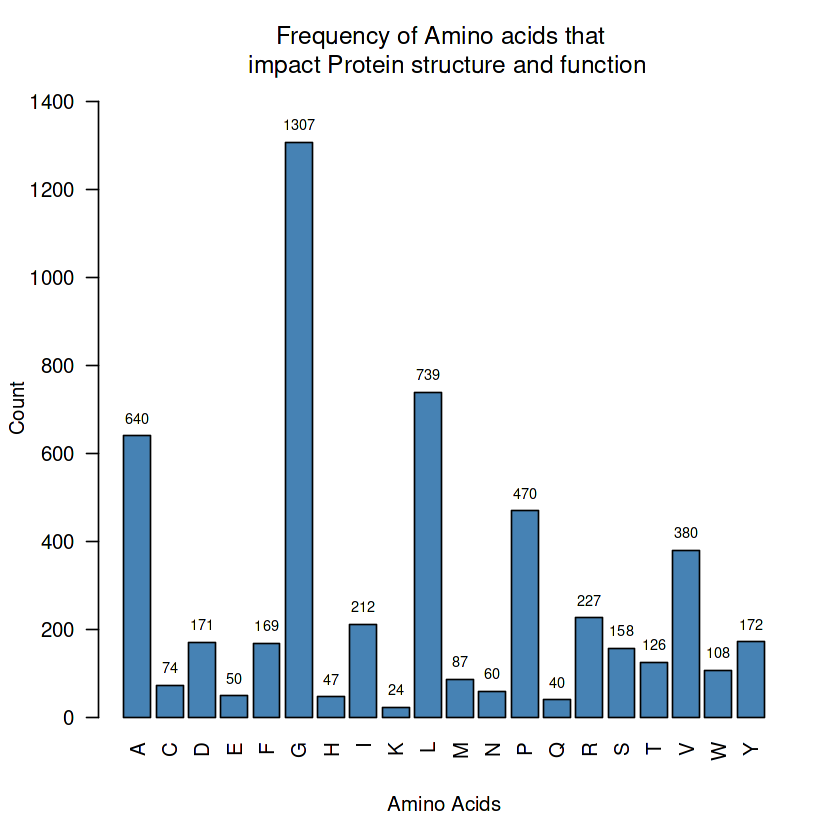

In [18]:
#Creating a barplot
bar <- barplot(freq_df$Count, xlab = "Amino Acids", ylab = "Count", 
        main = "Frequency of Amino acids that \n impact Protein structure and function", 
        font.main = 8, ylim = c(0, max(freq_df$Count) + 100), names.arg = freq_df$Value, col = "steelblue",las =2)
# Add text labels on top of each bar
text(x = bar, y = freq_df$Count, labels = freq_df$Count, pos = 3, cex = 0.7)

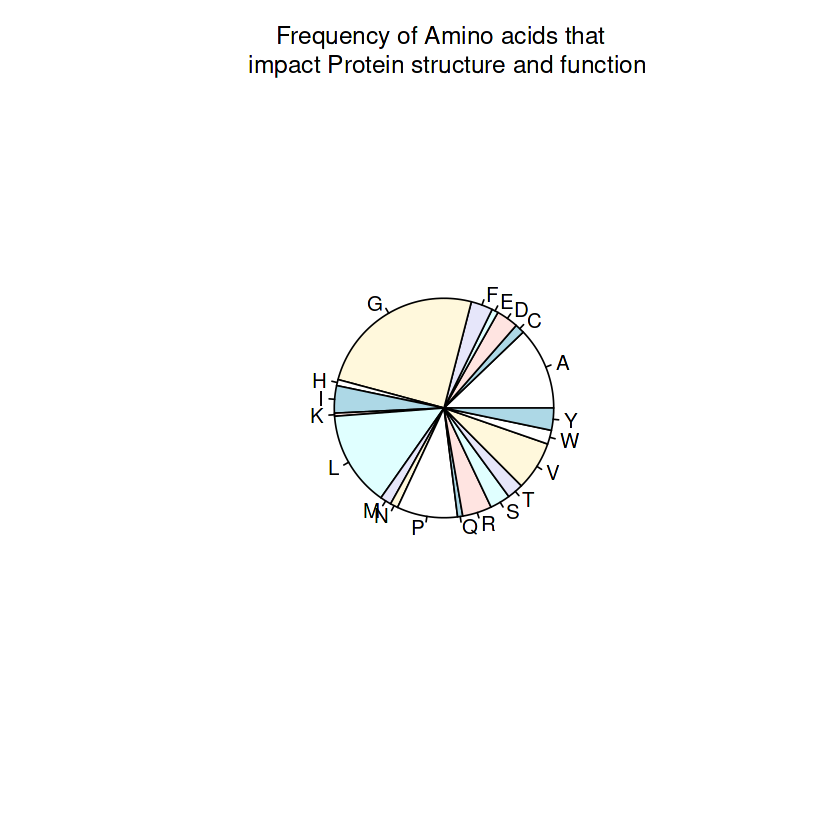

In [19]:
#Creating a pie chart
pie(freq_df$Count, labels = freq_df$Value, 
    main = "Frequency of Amino acids that \n impact Protein structure and function", 
    font.main = 8)

# *Briefly describe the amino acid with the highest impact on protein structure and function.*

The amino acid with the highest impact on protein structure and function is Glycine. Glycine is the simplest amino acid, 
with a single hydrogen atom as its side chain, making it achiral and highly flexible. It plays a crucial role in protein structure, 
neurotransmission, and the synthesis of vital biomolecules like glutathione and porphyrins. Additionally, glycine contributes to collagen 
stability and functions as an inhibitory neurotransmitter in the central nervous system.